Silhouette Plot

In [1]:
from clustering_functions import *
from sklearn.metrics import silhouette_score
from pre_processing_functions import preprocess
from pre_processing_functions import preprocess_semscalling
%load_ext autoreload
%autoreload 2

In [2]:
df= clustering('customer_info.csv')

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 2.1925015475197163


In [14]:
df

,customer_id,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,longitude,customer_age,children,has_children,years_active,typical_time_period,customer_educlevel,som_cluster,Kmeans_cluster,hierarchical_cluster
0,0.857491,1.0,0.630563,1.397552,0.222308,0.697011,-0.746487,0.522554,-0.041761,-0.020741,...,1.280767,-0.070222,1.051988,1.0,-0.723820,1.0,0.0,"(2, 1)",8,2
1,-1.143391,0.0,-0.905212,0.068829,-1.091868,0.697011,-0.702610,-1.013639,0.175355,0.077055,...,-0.272805,1.494491,-0.635180,1.0,0.331756,1.0,1.0,"(0, 1)",6,6
2,1.681577,1.0,0.630563,2.726275,-1.091868,2.650003,-0.349558,0.156583,0.175355,1.252093,...,0.400001,-1.020226,1.614377,1.0,0.753986,1.0,0.0,"(2, 1)",0,2
3,0.132769,0.0,-0.905212,-1.259894,0.222308,-1.255981,-0.459506,3.493649,0.175355,-1.055011,...,-0.116103,-0.293752,-1.197569,0.0,1.176217,1.0,0.0,"(1, 0)",4,0
4,-0.312294,0.0,-0.137325,0.068829,0.222308,1.348009,1.359075,-0.140940,0.175355,-0.714206,...,0.312330,0.265074,-0.072791,1.0,0.542871,1.0,1.0,"(1, 2)",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,1.475577,1.0,-0.137325,0.068829,-1.091868,-0.604983,2.022875,0.425679,0.609586,0.108173,...,2.169032,-1.579052,-0.072791,1.0,-0.723820,1.0,0.0,"(2, 0)",3,5
34056,0.640412,0.0,-0.137325,0.068829,-1.091868,0.046014,-0.325233,0.024381,-0.041761,-0.352656,...,-0.503196,-0.740813,-0.072791,1.0,-0.934935,1.0,0.0,"(1, 1)",1,2
34057,1.689280,1.0,-0.137325,-1.259894,0.222308,-0.604983,-0.399022,1.401049,0.826702,-0.500832,...,-0.634021,-1.634934,-0.635180,1.0,-0.723820,1.0,0.0,"(1, 0)",4,0
34058,-0.143340,1.0,-0.137325,0.068829,0.222308,0.697011,0.758298,0.274433,-0.910223,-0.807557,...,0.028836,0.544487,-0.072791,1.0,-0.090474,1.0,1.0,"(1, 1)",1,1


In [6]:
def calcular_silhouettes(X, dicionario_labels):
    for nome, labels in dicionario_labels.items():
        if len(set(labels)) > 1:
            try:
                score = silhouette_score(X, labels)
                print(f"{nome}: Silhouette Score = {score:.3f}")
            except Exception as e:
                print(f"{nome}: Erro ao calcular o silhouette score → {e}")
        else:
            print(f"{nome}: apenas um cluster encontrado (não é possível calcular o silhouette score)")

In [7]:
label_dict = {
    "KMeans": df['Kmeans_cluster'].values,
    "SOM": df['som_cluster'].values,
    "Hierarchical": df['hierarchical_cluster'].values
}

data = df[['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products']]
scores = calcular_silhouettes(data, label_dict)


KMeans: Silhouette Score = 0.195
SOM: Erro ao calcular o silhouette score → unhashable type: 'numpy.ndarray'
Hierarchical: Silhouette Score = 0.169


In [8]:
import umap
import numpy as np

# Reduzir para 2 dimensões
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_2d.fit_transform(data)

/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [9]:
scores_umap = calcular_silhouettes(X_umap, label_dict)

KMeans: Silhouette Score = 0.389
SOM: Erro ao calcular o silhouette score → unhashable type: 'numpy.ndarray'
Hierarchical: Silhouette Score = 0.388


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(df, feature_cols, cluster_col):
    X = df[feature_cols].values
    labels = df[cluster_col].values
    n_clusters = len(np.unique(labels))

    silhouette_vals = silhouette_samples(X, labels)
    silhouette_avg = silhouette_score(X, labels)

    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10

    for i in np.unique(labels):
        ith_cluster_vals = silhouette_vals[labels == i]
        ith_cluster_vals.sort()

        size_cluster_i = ith_cluster_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label ")
    ax.set_title(f"Silhouette Plot - {cluster_col}")
    plt.show()

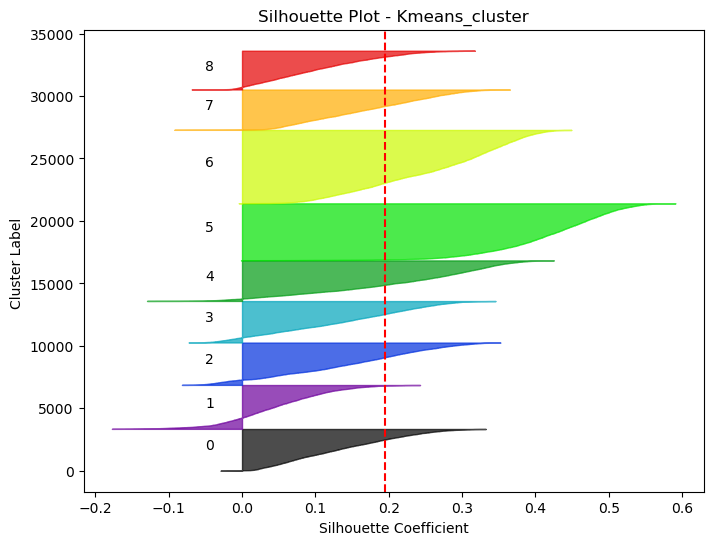

In [11]:
plot_silhouette(df, ['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products'], 'Kmeans_cluster')

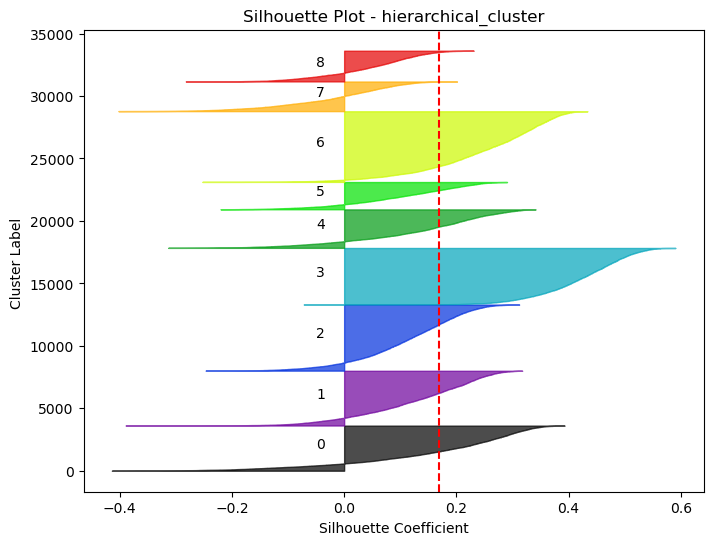

In [12]:
plot_silhouette(df, ['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products'], 'hierarchical_cluster')

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette_from_tuple(df, feature_cols=None, cluster_col=None):
    # If input is a tuple (X, labels), unpack
    if isinstance(df, tuple) and len(df) == 2:
        X, labels = df
    else:
        # Assume it's a DataFrame
        X = df[feature_cols].values
        labels = df[cluster_col].values

    # Ensure labels is a 1D array of ints
    labels = np.asarray(labels).ravel()
    n_clusters = len(np.unique(labels))

    # Compute silhouette scores
    silhouette_vals = silhouette_samples(X, labels)
    silhouette_avg = silhouette_score(X, labels)

    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10

    for i in np.unique(labels):
        ith_cluster_vals = silhouette_vals[labels == i]
        ith_cluster_vals.sort()

        size_cluster_i = ith_cluster_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.set_title("Silhouette Plot - som_cluster")
    plt.show()

In [29]:
som_grid_width = 2
df["som_cluster_int"] = df["som_cluster"].apply(lambda x: x[0]*som_grid_width + x[1])

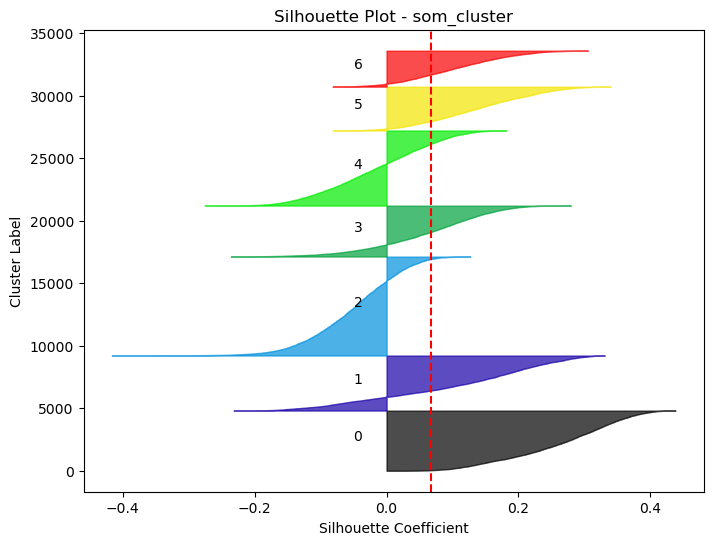

In [30]:
plot_silhouette_from_tuple(df, ['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products'], 'som_cluster_int')

With the analizis of the silhouette plots, we can conclude that Kmeans results in a better clustering solution